## Observations and Insights 

In [1]:
##1. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation and infers when the the mouse weight increases the average tumor volume also increases.
##2. By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice so a slightly higher male population
##3. From the selected treatments Capomulin and Ramicane are the most effective treatments.



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice= data_df['Mouse ID'].value_counts()
number_mice = len(mice)
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_df.loc[data_df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = pd.DataFrame(duplicate)
duplicate_mouse_id


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df[data_df['Mouse ID'].isin(duplicate)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean = clean_data_df["Mouse ID"].value_counts()
clean_mice = len(clean)
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drugreg_df = clean_data_df.groupby('Drug Regimen')
drugreg_df.head()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drugreg_df['Tumor Volume (mm3)'].mean()

tumor_median = drugreg_df['Tumor Volume (mm3)'].median()

tumor_variance = drugreg_df['Tumor Volume (mm3)'].var()

tumor_stdev = drugreg_df['Tumor Volume (mm3)'].std()

tumor_sem = drugreg_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drugreg_ssm_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance' : tumor_variance, 
                               'Standard Deviation' : tumor_stdev, 'SEM': tumor_sem})
drugreg_ssm_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_df = clean_data_df.groupby('Drug Regimen')
summ_statregimen_table = agg_regimen_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summ_statregimen_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

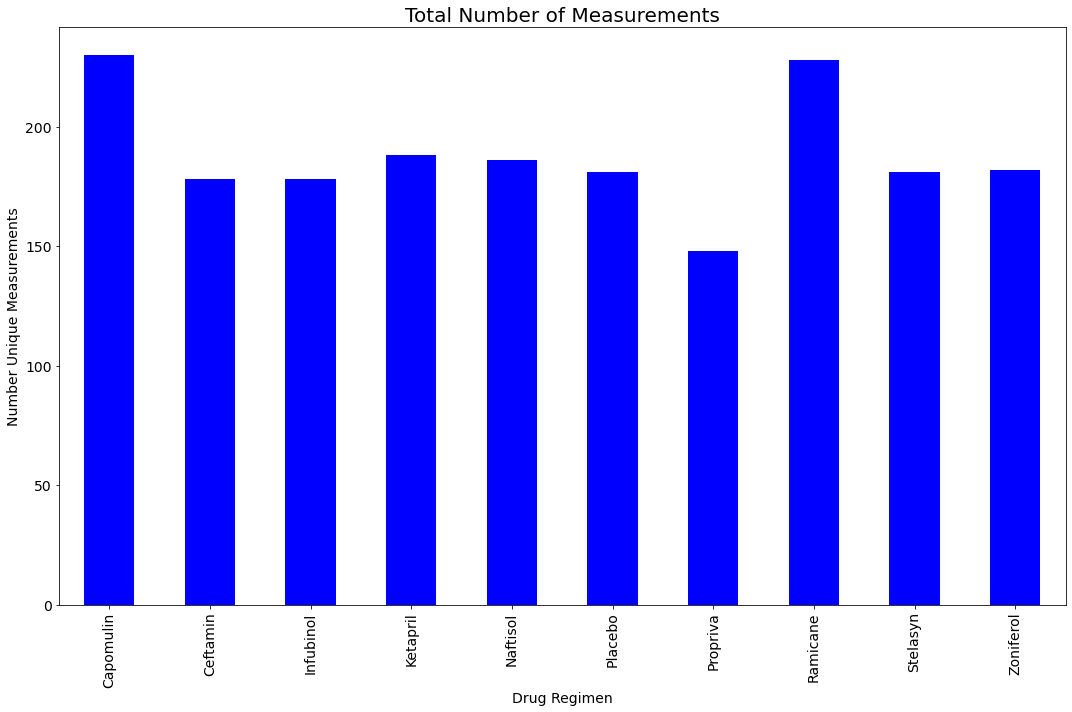

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_drug = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


plot_measurements = measurements_drug.plot.bar(figsize=(15,10), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number Unique Measurements",fontsize = 14)
plt.title("Total Number of Measurements",fontsize = 20)

plt.savefig("../Images/measurements_drug.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()



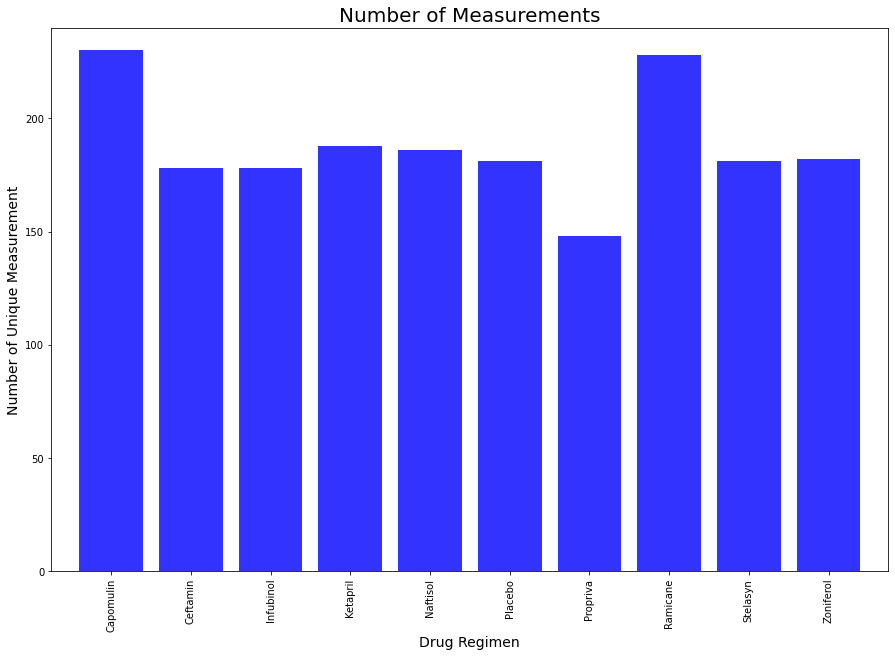

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_count  =(clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_count
import numpy as np
x_axis = np.arange(len(measurements_drug))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, drug_count, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_count)+10)

plt.title("Number of Measurements",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Unique Measurement",fontsize = 14)

plt.savefig("../Images/measurements_pyplot.png", bbox_inches = "tight")

C:\Users\Ryan.Lassiter\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


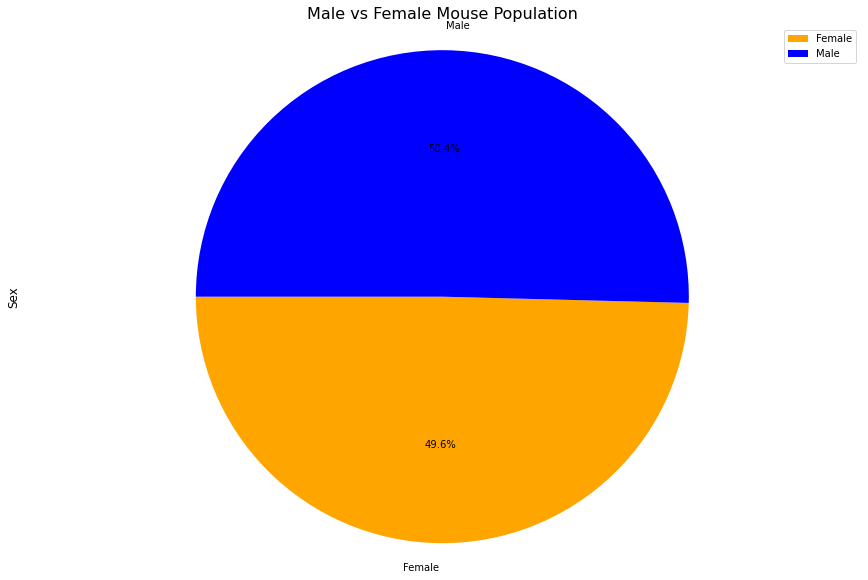

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#  Group by gender and get the number to plot
gendergroup_df = clean_data_df.groupby(["Mouse ID","Sex"])
gendergroup_df
gender_df = pd.DataFrame(gendergroup_df.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]


# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

colors = ['orange', 'blue']

plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=180, autopct="%.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 16)
plt.ylabel('Sex',fontsize = 12)
plt.axis("equal",fontsize = 12)

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()

C:\Users\Ryan.Lassiter\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


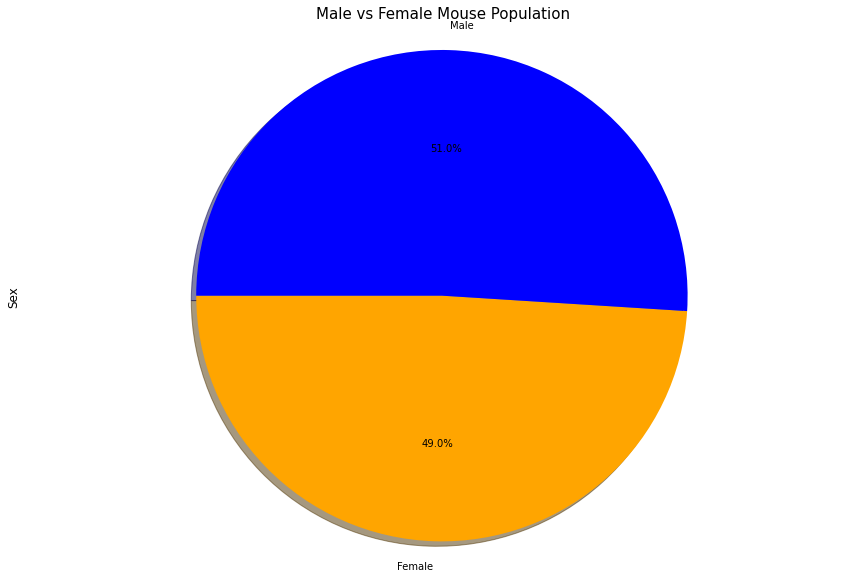

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49,51]

#Set colors for each section of the pie
colors = ['orange', 'blue']

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,)
plt.title('Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 12)
#Set equal axis
plt.axis("equal",fontsize = 12)

plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#slicing original DF with drug list
drug_df = clean_data_df[clean_data_df['Drug Regimen'].isin(drug_list)]
drug_df.head()

#.agg method on groupby mouse ID  
last_tumor = drug_df.groupby(['Drug Regimen','Mouse ID']).agg(\
            Last_tumor_size = ('Tumor Volume (mm3)', lambda x: x.iloc[-1]))

last_tumor

#unstack for drug regimens
last_tumor_DR = last_tumor.stack(level=0).unstack(level=0)
last_tumor_DR.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973419,NaN
a251,Last_tumor_size,NaN,NaN,65.525743,NaN
a275,Last_tumor_size,NaN,62.999356,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.407618
a444,Last_tumor_size,NaN,NaN,NaN,43.047543


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_voldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for x in treatments:
    final_tumorvol = clean_data_df.loc[clean_data_df["Drug Regimen"] ==x, "Tumor Volume (mm3)"]
    quartiles = final_tumorvol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq-lowerq
    tumor_voldata.append(final_tumorvol)
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    
   
     
    print(f'-----------------------------------------------------')
    print(f'The IQR for {x} is {IQR}')
    print(f'The lower quartile for {x} is {lowerq}')
    print(f'The upper quartile for {x} is {upperq}')
    print(F'For {x} Values below {lower_bound} could be outliers')
    print(f'For {x} Values above {upper_bound} could be outliers')
    print(f'-----------------------------------------------------')
    outlier = final_tumorvol.loc[(final_tumorvol < lower_bound)|(final_tumorvol > upper_bound)]
    
    if len(outlier) > 0:
        print(f'{x} has {len(outlier)} outlier(s)')
    

-----------------------------------------------------
The IQR for Capomulin is 7.314067135000002
The lower quartile for Capomulin is 37.685932865
The upper quartile for Capomulin is 45.0
For Capomulin Values below 26.714832162499995 could be outliers
For Capomulin Values above 55.9711007025 could be outliers
-----------------------------------------------------
Capomulin has 2 outlier(s)
-----------------------------------------------------
The IQR for Ramicane is 8.325365415000007
The lower quartile for Ramicane is 36.67463458499999
The upper quartile for Ramicane is 45.0
For Ramicane Values below 24.18658646249998 could be outliers
For Ramicane Values above 57.48804812250001 could be outliers
-----------------------------------------------------
Ramicane has 1 outlier(s)
-----------------------------------------------------
The IQR for Infubinol is 10.002090667500006
The lower quartile for Infubinol is 47.3123533
The upper quartile for Infubinol is 57.314443967500004
For Infubinol Va

<function matplotlib.pyplot.show(*args, **kw)>

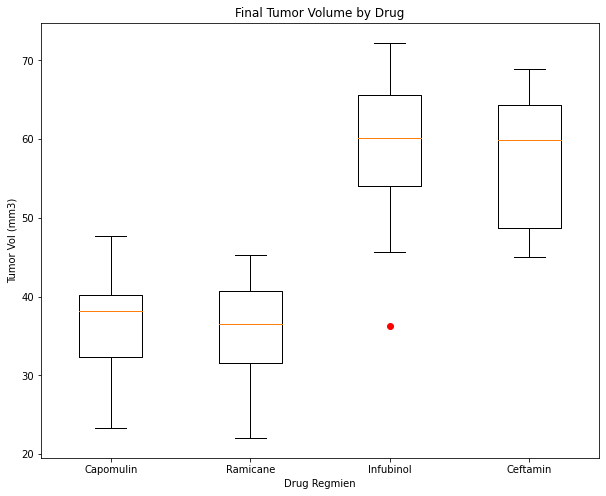

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

#for loop for drug names + append to boxplot_list.  Dropping the NA values as above
for x in treatments: 
        boxplot_list.append(list(last_tumor_DR[x].dropna()))
#plotting  
fig1, ax = plt.subplots(figsize=(10,8))
ax.set_title('Final Tumor Volume by Drug')
ax.set_xlabel("Drug Regmien")
ax.set_ylabel("Tumor Vol (mm3)")
ax.boxplot(boxplot_list,notch=0, sym="r")
plt.xticks([1,2,3,4],treatments)

plt.savefig('../Images/boxwhiskerplot.png')

plt.show

## Line and Scatter Plots

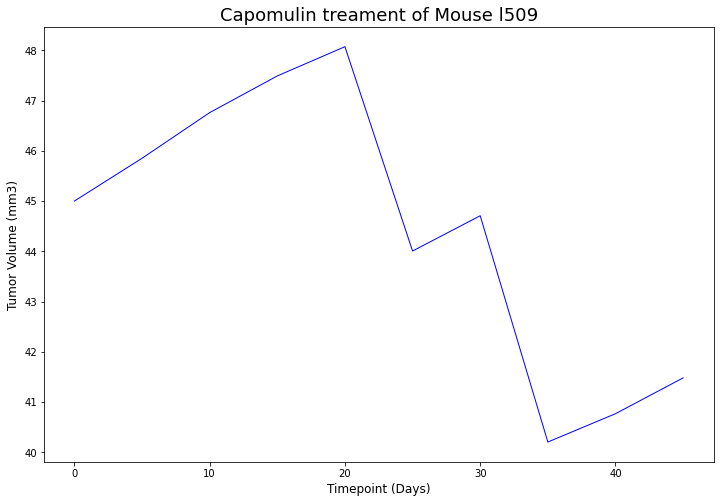

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Capomulin DF
Capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
#Capomulin df.loc for mouse ID l509
capomulin_singlemouse = Capomulin_df.loc[Capomulin_df['Mouse ID']=='l509']
capomulin_singlemouse.head()

#plotting 
x_axis = capomulin_singlemouse["Timepoint"]
tumorsize = capomulin_singlemouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize =(12,8))
plt.title('Capomulin treament of Mouse l509', fontsize = 18)
plt.plot(x_axis, tumorsize, linewidth=1, markersize = 10, color = "blue")
plt.xlabel("Timepoint (Days)",fontsize = 12)
plt.ylabel("Tumor Volume (mm3)", fontsize = 12)

plt.savefig("../Images/linegraph.png")
plt.show()

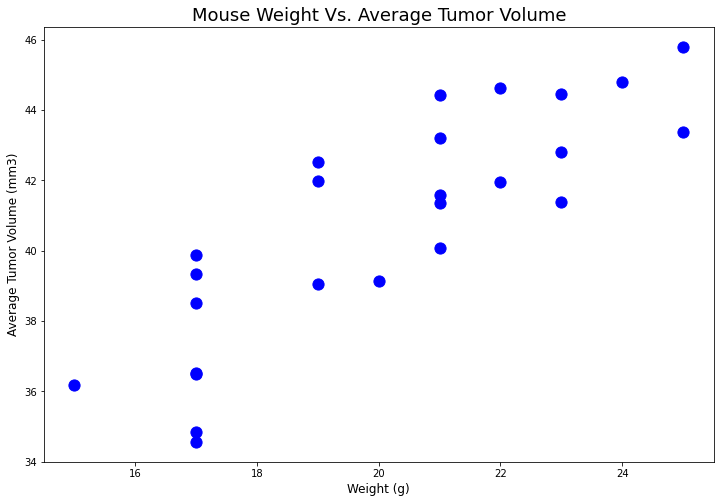

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#plotting
fig1, ax1 = plt.subplots(figsize=(12,8))
avg_tumvolume = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size= 12
plt.scatter(avg_tumvolume['Weight (g)'],avg_tumvolume['Tumor Volume (mm3)'], s = 125,color="blue")
plt.title("Mouse Weight Vs. Average Tumor Volume", Fontsize = 18)
plt.xlabel("Weight (g)", fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize =12)

plt.savefig("../Images/scatterplot.png")
plt.show()


## Correlation and Regression

The correllation coefficiant between both factors is 0.84
 The r-squared value is: 0.8419363424694718
 The line equation is: y= 0.95x + 21.55


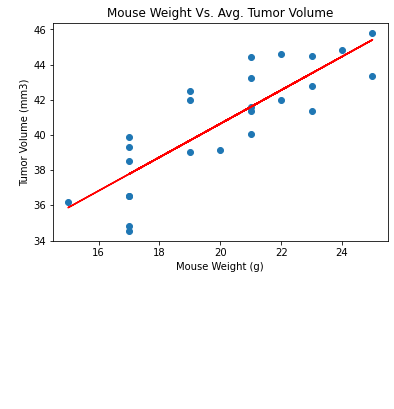

In [18]:
# Calculate the correlation coefficient and linear regression model 
Correl_coeff = st.pearsonr(avg_tumvolume['Weight (g)'],avg_tumvolume['Tumor Volume (mm3)'])
print(f"The correllation coefficiant between both factors is {round(Correl_coeff[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen

#linear reggression
from scipy.stats import linregress
x_values = avg_tumvolume["Weight (g)"]
y_values = avg_tumvolume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_equation = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'


#plotting
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(13,25),fontsize = 12,color = "red")
plt.title("Mouse Weight Vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(F" The r-squared value is: {rvalue}")
print(F" The line equation is: {line_equation}")